In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)


/kaggle/input
/kaggle/input/cucumber-leaf-disease
/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease
/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease/test
/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease/test/Downy_mildew
/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease/test/Powdery_mildew
/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease/test/Healthy_leaves
/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease/train
/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease/train/Downy_mildew
/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease/train/Powdery_mildew
/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease/train/Healthy_leaves


In [6]:
train_dir = '/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease/train'
test_dir = '/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease/test'

In [7]:
import os

print("Train folder found:", os.path.exists(train_dir))
print("Test folder found:", os.path.exists(test_dir))
print("Train Classes:", os.listdir(train_dir))

Train folder found: True
Test folder found: True
Train Classes: ['Downy_mildew', 'Powdery_mildew', 'Healthy_leaves']


In [9]:
!pip install tensorflow seaborn --quiet

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Set paths
train_dir = '/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease/train'
test_dir = '/kaggle/input/cucumber-leaf-disease/cucumber_Leaf_Disease/test'

# Parameters
img_size = 224
batch_size = 32

# Data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(train_dir, target_size=(img_size, img_size),
                                         batch_size=batch_size, class_mode='categorical', subset='training')

val_data = datagen.flow_from_directory(train_dir, target_size=(img_size, img_size),
                                       batch_size=batch_size, class_mode='categorical', subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size),
                                             batch_size=1, class_mode='categorical', shuffle=False)


Found 2964 images belonging to 3 classes.
Found 739 images belonging to 3 classes.
Found 51 images belonging to 3 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Custom CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.6351 - loss: 1.1402 - val_accuracy: 0.9053 - val_loss: 0.2410
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9194 - loss: 0.2118 - val_accuracy: 0.9215 - val_loss: 0.1763
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9398 - loss: 0.1730 - val_accuracy: 0.9012 - val_loss: 0.2395
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9505 - loss: 0.1411 - val_accuracy: 0.9256 - val_loss: 0.2391
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9591 - loss: 0.1059 - val_accuracy: 0.9202 - val_loss: 0.2223
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9684 - loss: 0.0913 - val_accuracy: 0.9039 - val_loss: 0.2645
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.9664 - loss: 0.0894 - val_accuracy: 0.8593 - val_loss: 0.4344
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.9847 - loss: 0.0438 - val_accuracy: 0.8728 - v

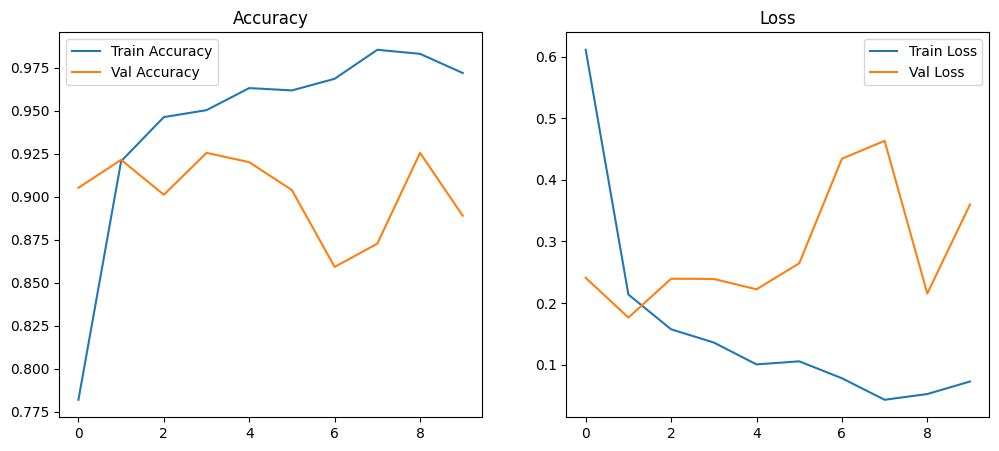

In [15]:
# Accuracy & Loss graphs
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


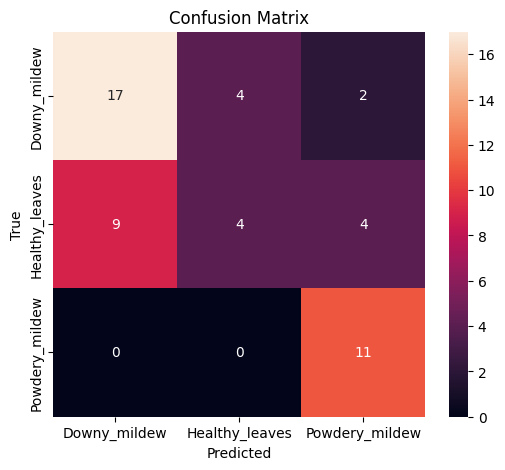

Classification Report:

                precision    recall  f1-score   support

  Downy_mildew       0.65      0.74      0.69        23
Healthy_leaves       0.50      0.24      0.32        17
Powdery_mildew       0.65      1.00      0.79        11

      accuracy                           0.63        51
     macro avg       0.60      0.66      0.60        51
  weighted avg       0.60      0.63      0.59        51



In [16]:
# Confusion Matrix and Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes
labels = list(test_data.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=labels))

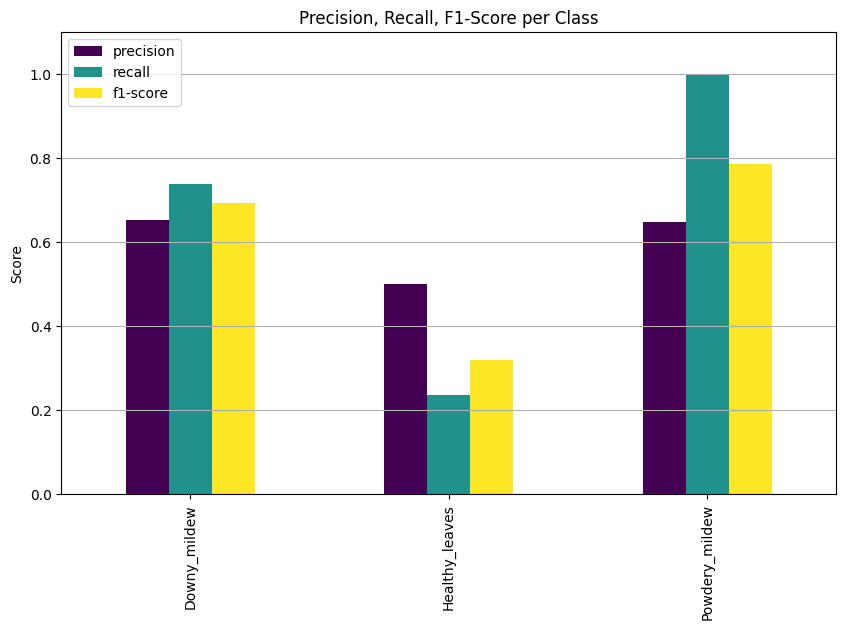

In [17]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate report as dict
report = classification_report(y_true, y_pred_classes, target_names=labels, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

# Plot bar chart
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("Precision, Recall, F1-Score per Class")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


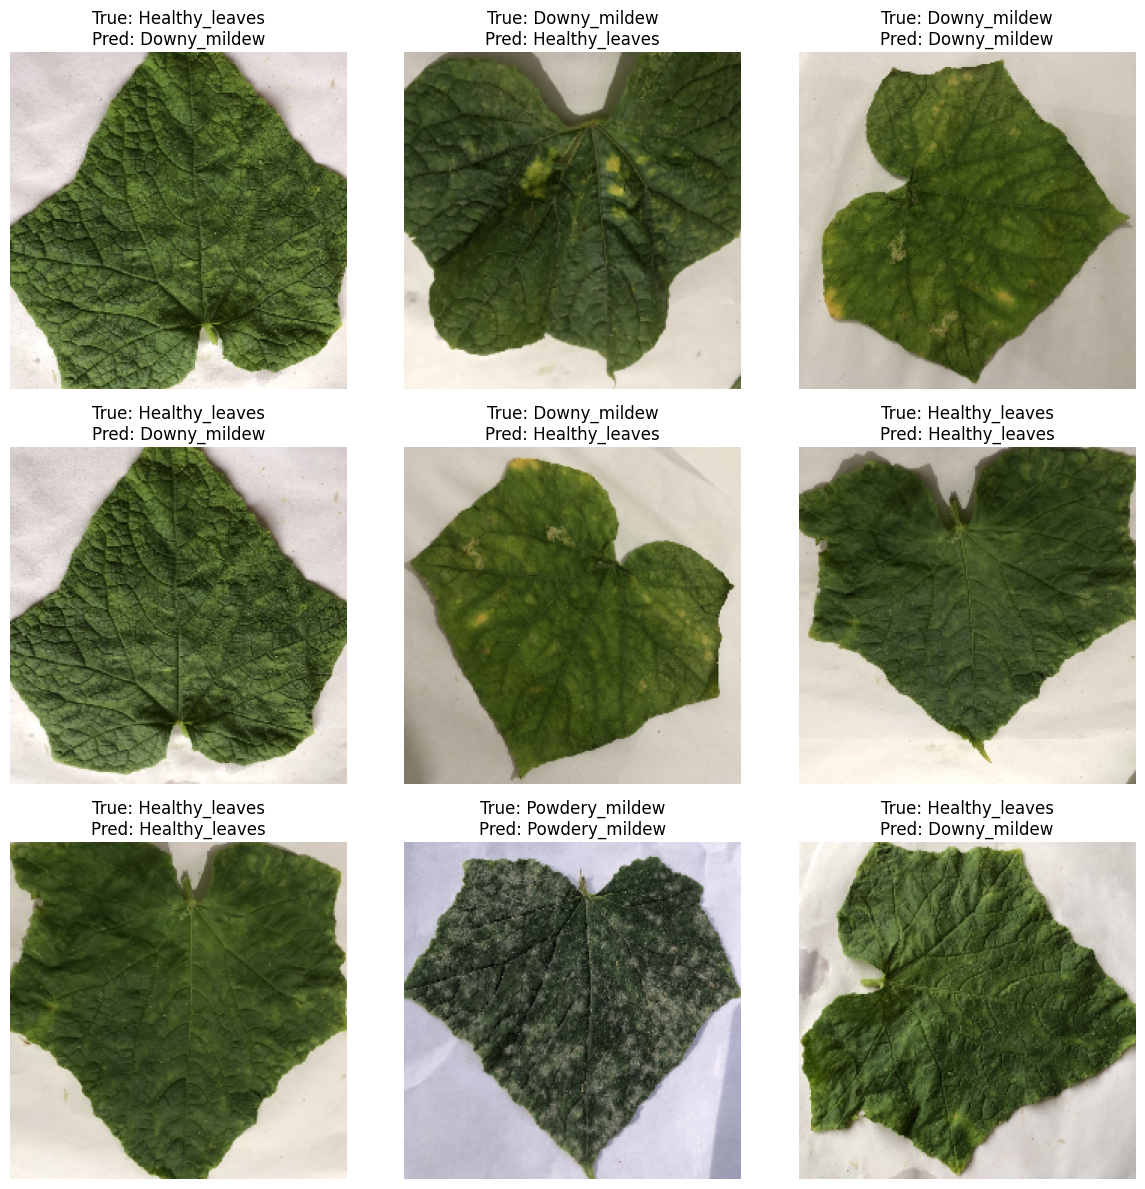

In [18]:
import random
from tensorflow.keras.preprocessing import image

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for ax in axes.flatten():
    idx = random.randint(0, len(test_data.filenames)-1)
    img_path = test_data.filepaths[idx]
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_expanded = np.expand_dims(img_array, axis=0)

    pred_idx = np.argmax(model.predict(img_expanded))
    true_idx = y_true[idx]

    ax.imshow(img_array)
    ax.set_title(f"True: {labels[true_idx]}\nPred: {labels[pred_idx]}", fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


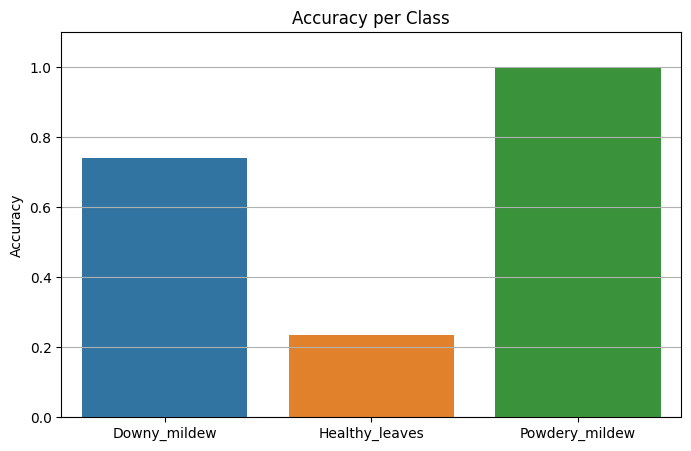

In [19]:
correct = (y_pred_classes == y_true)
class_wise_total = np.bincount(y_true)
class_wise_correct = np.bincount(y_true[correct])
class_wise_acc = class_wise_correct / class_wise_total

plt.figure(figsize=(8,5))
sns.barplot(x=labels, y=class_wise_acc)
plt.title("Accuracy per Class")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.show()